In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [48]:
df = pd.read_csv('/Users/pafumat/Downloads/AZWatch_subscribers.csv')

In [49]:
df.head()

,subscriber_id,age_group,engagement_time,engagement_frequency,subscription_status
0,14451,18-34,5.55,7,subscribed
1,18386,under 18,5.12,12,subscribed
2,12305,35 and over,4.25,4,churned
3,17546,18-34,8.54,15,subscribed
4,15399,18-34,12.12,20,subscribed


In [50]:
df.describe()

,subscriber_id,engagement_time,engagement_frequency
count,1000.000000,1000.000000,1000.000000
mean,15024.803000,6.180030,9.978000
std,2927.044957,2.757166,6.236859
min,10000.000000,0.220000,0.000000
25%,12452.500000,3.917500,5.000000
50%,15184.000000,6.000000,8.000000
75%,17481.250000,8.110000,15.000000
max,19976.000000,16.980000,45.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscription_status   1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [52]:
# Step 1: Define features and label
X = df.drop(columns=['subscriber_id', 'subscription_status'])
y = df['subscription_status'].map({'subscribed': 0, 'churned': 1})  # Binary encode

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define preprocessing
categorical_features = ['age_group']
numerical_features = ['engagement_time', 'engagement_frequency']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Step 4: Create and train pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10))
])

model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}')

[[99 10]
 [11 80]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       109
           1       0.89      0.88      0.88        91

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200

ROC AUC Score: 0.9704


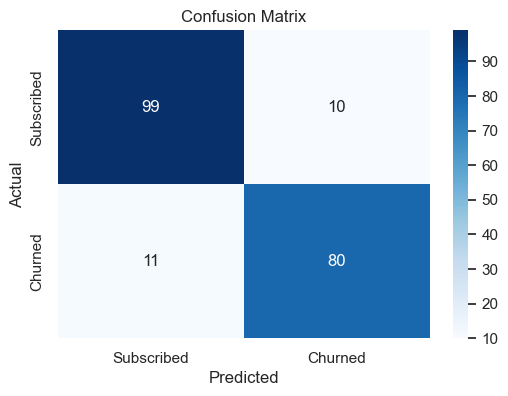

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Subscribed', 'Churned'],
            yticklabels=['Subscribed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

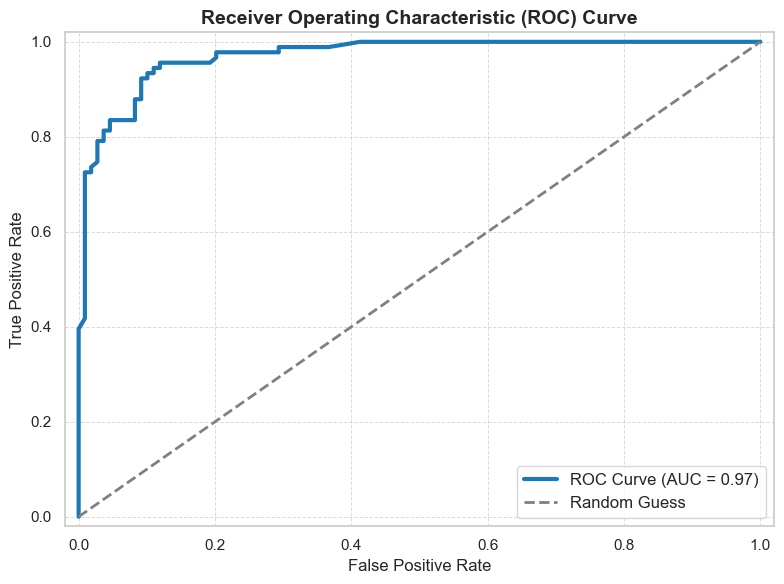

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Set seaborn style for nicer visuals
sns.set(style='whitegrid')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#1f77b4', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

# Beautify the plot
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


In [55]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

              precision    recall  f1-score  support
0              0.900000  0.908257  0.904110  109.000
1              0.888889  0.879121  0.883978   91.000
accuracy       0.895000  0.895000  0.895000    0.895
macro avg      0.894444  0.893689  0.894044  200.000
weighted avg   0.894944  0.895000  0.894950  200.000


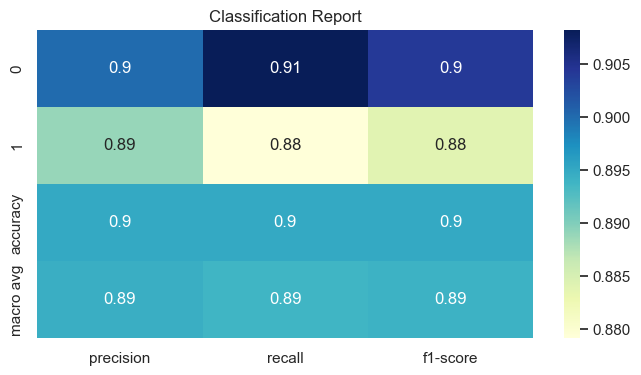

In [56]:
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report')
plt.show()


In [57]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True)
}


In [58]:
for name, classifier in models.items():
    print(f'\n📊 Model: {name}')
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Evaluate
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}')



📊 Model: Logistic Regression
[[101   8]
 [  7  84]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.91      0.92      0.92        91

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

ROC AUC Score: 0.9627

📊 Model: Random Forest
[[98 11]
 [14 77]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       109
           1       0.88      0.85      0.86        91

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

ROC AUC Score: 0.9685

📊 Model: SVM
[[102   7]
 [  8  83]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.92      0.91      0.92        91

    a